## Visuals

In [123]:
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [124]:
db = pd.read_csv('clean_data_complete.csv')

In [125]:
db

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0
96120,nacional,presencial,griselda rodriguez rojas,inpi,NaN,adquisiciones,41,adjudicacion,1,0,...,0,1,0,8,12,13,55,0,0,0


In [126]:
db.dtypes

Caracter del procedimiento                  object
Forma del procedimiento                     object
Operador                                    object
Correo electronico                          object
Entidad federativa                          object
Tipo de contratacion                        object
Articulo                                    object
Plantilla                                   object
Forma_Procedimiento_Presencial               int64
Forma_Procedimiento_Electronica              int64
Forma_Procedimiento_Mixta                    int64
Entidad_federativa_Norte                     int64
Entidad_federativa_Centro                    int64
Entidad_federativa_Golfo                     int64
Entidad_federativa_PacificoSur               int64
Entidad_federativa_Sur                       int64
Entidad_federativa_PacificoNorte             int64
Caracter del procedimiento_Nacional          int64
Caracter del procedimiento_Internacional     int64
Articulo de excepcion_41       


Articulo != '42' AND Most_used_description_word_adquisicion = '0' AND Caracter del procedimiento = 'nacional' AND Tipo de contratacion != 'servicios' 

In [127]:
db['Forma_Procedimiento_Presencial'] = db['Forma_Procedimiento_Presencial'].astype(str)

In [130]:
df_articulo = db[(db['Caracter del procedimiento'] != 'nacional') & (db['Tipo de contratacion'] != 'servicios') & (db['Articulo'] != 42) & (db['Forma_Procedimiento_Presencial'])]

2        0
129      1
250      0
459      0
469      0
        ..
96093    0
96105    0
96112    0
96113    0
96116    0
Name: Forma_Procedimiento_Presencial, Length: 14063, dtype: object

In [135]:
df_articulo = db[db['Articulo'] != 42]

&lt;seaborn.axisgrid.FacetGrid at 0x7fe84cf42790&gt;

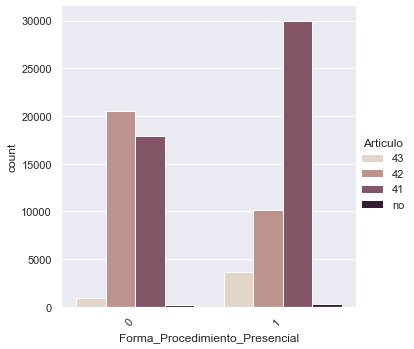

In [136]:
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=df_articulo,
    x='Forma_Procedimiento_Presencial',
    kind = 'count',
    palette="ch:.25",
    hue = 'Articulo'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')

In [150]:
df_articulo = db[(db['Most_used_description_word_adquisicion'] == 0) & (db['Caracter del procedimiento'] != 'nacional') & (db['Tipo de contratacion'] != 'servicios') & (db['Articulo'] != 42)]
df_articulo

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
250,internacional abierto,mixta,maria de jesus carrillo gallardo,jalisco,NaN,adquisiciones,NaN,adjudicacion,0,0,...,0,0,0,8,21,8,50,0,0,0
459,internacional bajo tlc,electronica,marian concepcion cicero rubio,imss,NaN,adquisiciones,41,adjudicacion,0,1,...,0,0,0,5,15,8,39,1,0,0
469,internacional bajo tlc,electronica,vicente alejandro arroyo davila,imss,norte,adquisiciones,42,adjudicacion,0,1,...,0,0,0,3,6,13,58,1,0,0
521,internacional,presencial,maria guadalupe cortes hernandez,cardiologia,NaN,adquisiciones,42,adjudicacion,1,0,...,0,0,0,3,20,11,20,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96082,internacional,electronica,ada elizabeth cobos moreno,imss,golfo,adquisiciones,41,adjudicacion,0,1,...,0,0,0,8,10,15,22,1,0,0
96092,internacional,presencial,uzziel pineda avila,cardiologia,NaN,adquisiciones,42,adjudicacion,1,0,...,0,0,1,8,27,16,17,0,1,0
96112,otro,electronica,patricia xospa villeda,semar,NaN,adquisiciones,NaN,reporte,0,1,...,0,0,0,8,6,12,20,0,0,1
96113,internacional,electronica,nancy ramirez resendiz,incan,NaN,adquisiciones,41,adjudicacion,0,1,...,0,0,0,8,6,12,57,0,0,0


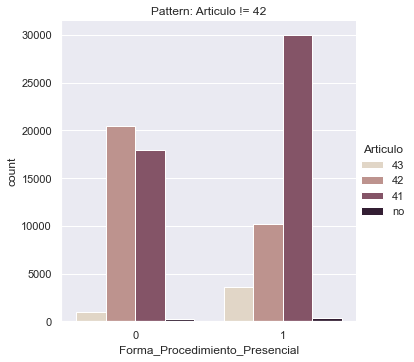

In [161]:
#Plotting 1 item
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=db,
    x='Forma_Procedimiento_Presencial',
    kind = 'count',
    palette="ch:.25",
    hue = 'Articulo'
    )
plt.title('Pattern: Articulo != 42')
plt.show()

In [52]:
# Create the figure:
p = figure(x_axis_label='Tipo de contratacion', y_axis_label='Caracter del procedimiento')
# Add a circle glyph to the figure p
p.circle( x =df_articulo['Tipo de contratacion'] , y = df_articulo['Caracter del procedimiento'])
# Call the output_notebook()
output_notebook()
show(p)

Loading BokehJS ...

AttributeError: &#39;DataFrameGroupBy&#39; object has no attribute &#39;get&#39;

&lt;seaborn.axisgrid.FacetGrid at 0x7fe872466350&gt;

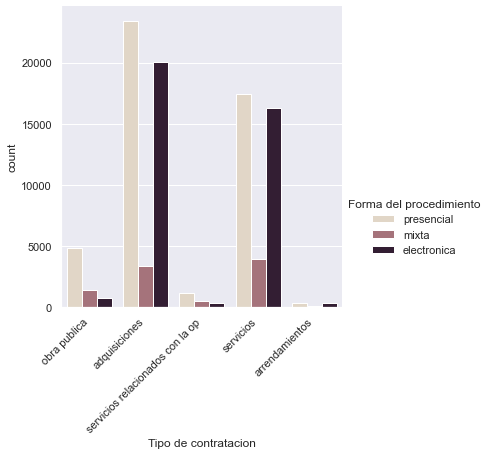

In [65]:
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=db,
    x='Tipo de contratacion',
    kind = 'count',
    palette="ch:.25",
    hue = 'Forma del procedimiento'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')





In [56]:
db[(db['Most_used_description_word_material'] == 0) & (db['Most_used_UC_word_gyr'] == 0) & (db['Articulo'] != 42) & (db['Tipo de contratacion'] != 'servicios') ]

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96116,otro,electronica,patricia xospa villeda,semar,NaN,adquisiciones,NaN,reporte,0,1,...,0,0,0,8,6,13,55,0,0,1
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0


&lt;seaborn.axisgrid.FacetGrid at 0x7f9bce769e10&gt;

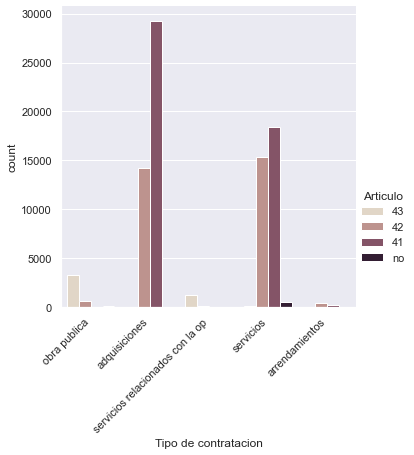

In [59]:
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.catplot(
    data=db,
    x='Tipo de contratacion',
    kind = 'count',
    palette="ch:.25",
    hue = 'Articulo'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')

[Text(0, 0, &#39;sur&#39;),
 Text(0, 0, &#39;bajio&#39;),
 Text(0, 0, &#39;golfo&#39;),
 Text(0, 0, &#39;centro&#39;),
 Text(0, 0, &#39;norte&#39;),
 Text(0, 0, &#39;pacifico norte&#39;),
 Text(0, 0, &#39;pacifico sur&#39;)]

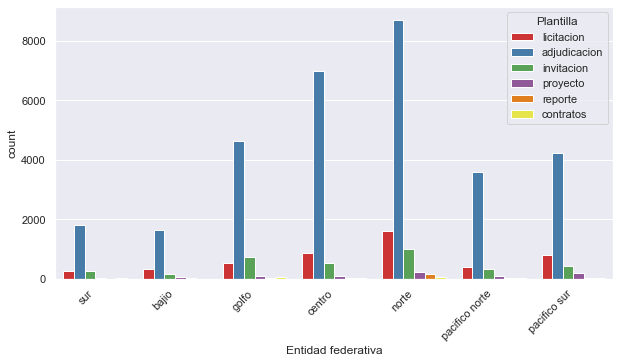

In [43]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=db,
    x='Entidad federativa',
    hue = 'Plantilla',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

GlyphRenderer(id=&#39;1027&#39;, ...)